In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define the path to your train data file
data_path = "./Dataset/train.csv"

# Load the data into a Pandas DataFrame
df = pd.read_csv(data_path)
df.reset_index(inplace=True)

In [5]:
# Display the first few rows of the DataFrame
df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [6]:
# Get basic summary statistics for numerical columns
df.describe()

,index,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000
mean,29999.500000,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333
std,17320.652413,24.082642,12.141435,0.042505,0.071627,0.0,714.910468
min,0.000000,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000
25%,14999.750000,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000
50%,29999.500000,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000
75%,44999.250000,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000
max,59999.000000,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000


In [7]:
# Get information about the data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                60000 non-null  int64  
 1   rent_approval_date   60000 non-null  object 
 2   town                 60000 non-null  object 
 3   block                60000 non-null  object 
 4   street_name          60000 non-null  object 
 5   flat_type            60000 non-null  object 
 6   flat_model           60000 non-null  object 
 7   floor_area_sqm       60000 non-null  float64
 8   furnished            60000 non-null  object 
 9   lease_commence_date  60000 non-null  int64  
 10  latitude             60000 non-null  float64
 11  longitude            60000 non-null  float64
 12  elevation            60000 non-null  float64
 13  subzone              60000 non-null  object 
 14  planning_area        60000 non-null  object 
 15  region               60000 non-null 

In [8]:
# Check unique values in categorical columns
print(f' Unique value in rent_approval_date: {df["rent_approval_date"].unique()}')
print(f' Unique value in town: {df["town"].unique()}')
print(f' Unique value in block: {df["block"].unique()}')
print(f' Unique value in street_name: {df["street_name"].unique()}')
print(f' Unique value in flat_type: {df["flat_type"].unique()}')
print(f' Unique value in flat_model: {df["flat_model"].unique()}')

 Unique value in rent_approval_date: ['2021-09' '2022-05' '2022-10' '2021-08' '2022-11' '2023-04' '2021-01'
 '2022-06' '2021-10' '2021-04' '2021-03' '2022-02' '2021-07' '2022-12'
 '2023-01' '2022-01' '2023-07' '2021-06' '2023-05' '2023-03' '2021-05'
 '2021-02' '2022-07' '2023-06' '2022-03' '2023-02' '2021-12' '2022-04'
 '2021-11' '2022-08' '2022-09']
 Unique value in town: ['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
 Unique value in block: ['257' '119' '157' ... '509c' '218a' '880a']
 Unique value in street_name: ['Jurong East Street 24' 'bedok north road' 'lorong 1 toa payoh' ...
 'seng poh road' 'Jurong West Street 51' 'Zion Road']
 Unique value in flat_type: ['3 room' '4-room' '3-room' 'executive' '5 room

# Process the first column(rent_approval_date)


In [9]:
# Check the data type of the 'rent_approval_date' column
df['rent_approval_date'].dtype

dtype('O')

In [10]:
# Convert 'rent_approval_date' to a datetime data type
df['rent_approval_date'] = pd.to_datetime(df['rent_approval_date'])
df['rent_approval_date'].dtype

dtype('<M8[ns]')

In [11]:
# Extract year, month, and day
approval_year = df['rent_approval_date'].dt.year
approval_month= df['rent_approval_date'].dt.month
approval_day = df['rent_approval_date'].dt.day

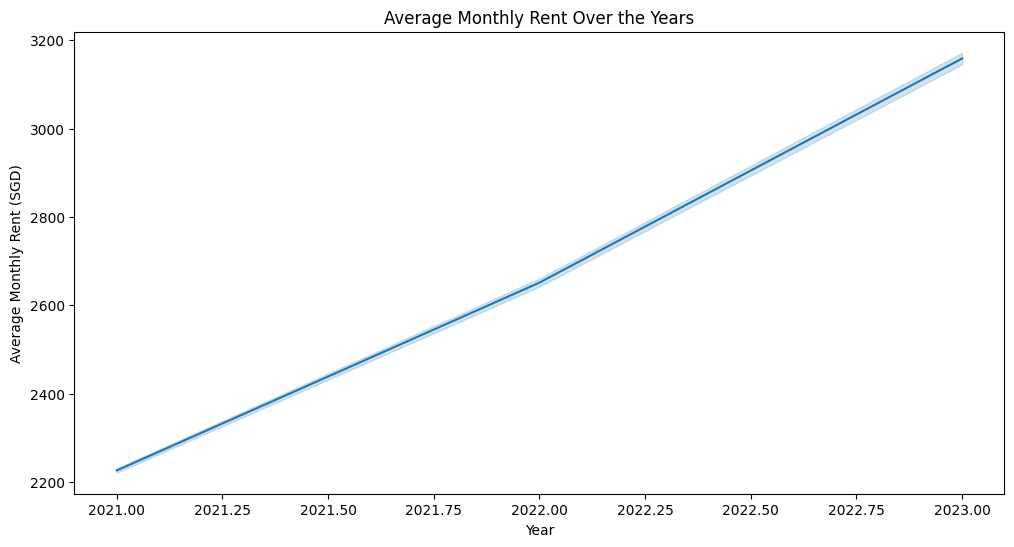

In [12]:
# Example: Line plot of average monthly rent over years
plt.figure(figsize=(12, 6))
sns.lineplot(x=approval_year, y='monthly_rent', data=df)
plt.title("Average Monthly Rent Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Monthly Rent (SGD)")
plt.show()

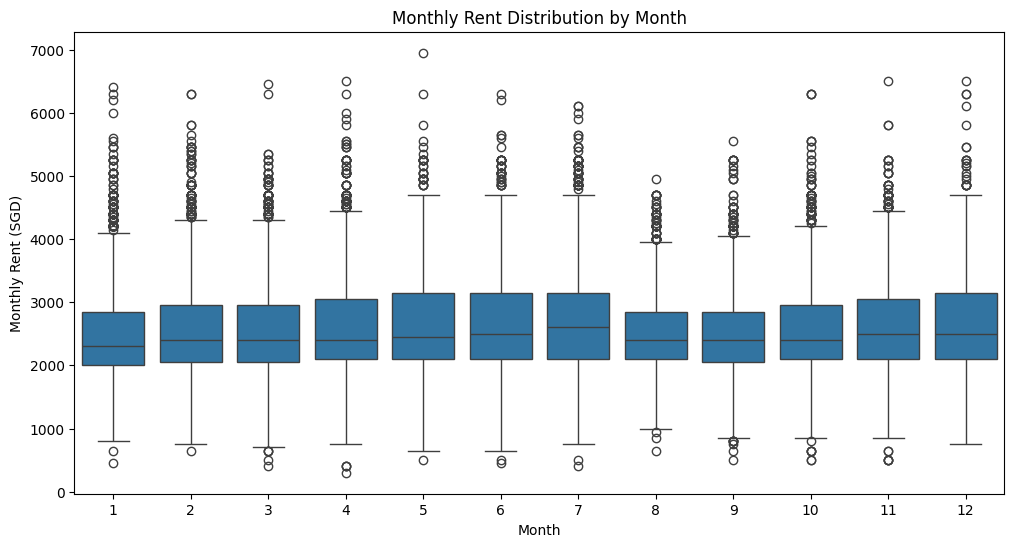

In [13]:
# Example: Box plot of monthly rent by month
plt.figure(figsize=(12, 6))
sns.boxplot(x=approval_month, y='monthly_rent', data=df)
plt.title("Monthly Rent Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Monthly Rent (SGD)")
plt.show()

In [14]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Define a reference date (e.g., the earliest date in the dataset)
reference_date = df['rent_approval_date'].min()

# Calculate the number of months from the reference date
df['rent_approval_date'] = (df['rent_approval_date'] - reference_date) // pd.Timedelta(days=30)

# Display the transformed DataFrame
print(df[['rent_approval_date']])


       rent_approval_date
0                       8
1                      16
2                      21
3                       7
4                      22
...                   ...
59995                   8
59996                  27
59997                  17
59998                  24
59999                  25

[60000 rows x 1 columns]


# Process the second column(town)


In [15]:
# Display the frequency distribution of towns
town_counts = df['town'].value_counts()
print(town_counts)

town
jurong west        4413
tampines           4183
sengkang           4003
bedok              3644
ang mo kio         3494
yishun             3378
bukit merah        3160
woodlands          3031
hougang            2859
punggol            2700
toa payoh          2407
clementi           2272
bukit batok        2236
choa chu kang      2117
queenstown         2033
kallang/whampoa    1860
geylang            1716
pasir ris          1712
jurong east        1710
bukit panjang      1607
sembawang          1446
bishan             1437
serangoon          1299
central             615
marine parade       612
bukit timah          56
Name: count, dtype: int64


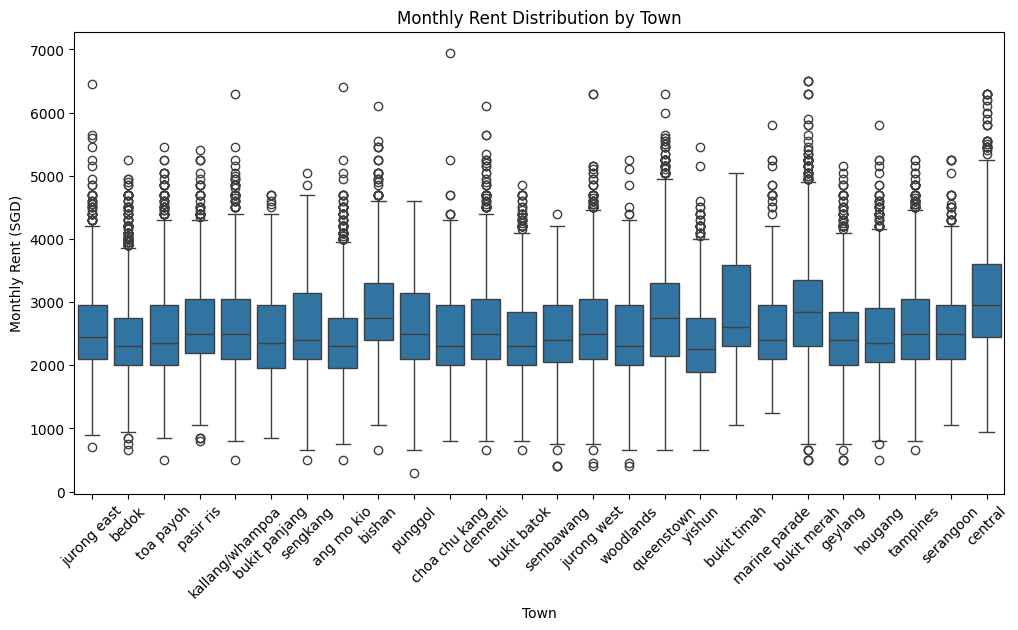

In [16]:
# Create a box plot of monthly rent by town
plt.figure(figsize=(12, 6))
sns.boxplot(x='town', y='monthly_rent', data=df)
plt.title("Monthly Rent Distribution by Town")
plt.xlabel("Town")
plt.ylabel("Monthly Rent (SGD)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [17]:
# Target Encoding
# Calculate the mean monthly rent for each town
town_mean_rent = df.groupby('town')['monthly_rent'].mean().to_dict()

# Map the mean rent values to the 'town' column
df['town'] = df['town'].map(town_mean_rent)


In [18]:
df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,0,8,2595.146199,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,1,16,2438.227223,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2,21,2516.680515,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,3,7,2686.857477,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,4,22,2665.537634,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


# Process the third column(blk)

In [19]:
# Remove non-numeric characters from the 'block' column and convert to numeric
df['block'] = df['block'].str.replace(r'\D+', '', regex=True).astype(int)


In [20]:
df['block']

0        257
1        119
2        157
3        250
4         34
        ... 
59995    441
59996     95
59997    862
59998     67
59999    445
Name: block, Length: 60000, dtype: int64

# Process the fifth column(blk)

In [21]:
# Map 'executive' to '6' and fill missing values with a default value, e.g., -1
df['flat_type'] = df['flat_type'].replace('executive', '6')
# Remove non-numeric characters and handle 'executive' values
df['flat_type'] = df['flat_type'].str.extract('(\d)', expand=False)

df['flat_type']

0        3
1        4
2        3
3        6
4        3
        ..
59995    3
59996    4
59997    5
59998    5
59999    3
Name: flat_type, Length: 60000, dtype: object

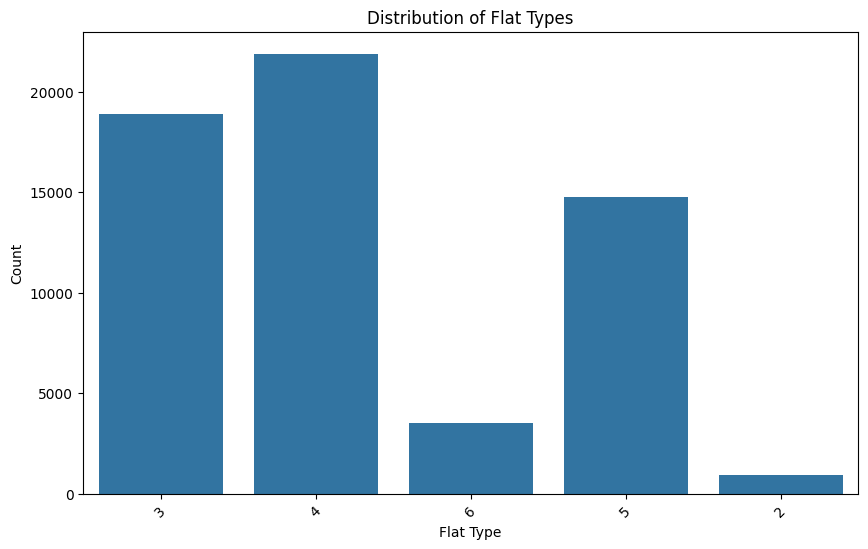

In [22]:
# Create a bar plot of flat types
plt.figure(figsize=(10, 6))
sns.countplot(x='flat_type', data=df)
plt.title("Distribution of Flat Types")
plt.xlabel("Flat Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [23]:
df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,0,8,2595.146199,257,Jurong East Street 24,3,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,1,16,2438.227223,119,bedok north road,4,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2,21,2516.680515,157,lorong 1 toa payoh,3,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,3,7,2686.857477,250,Pasir Ris Street 21,6,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,4,22,2665.537634,34,Whampoa West,3,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


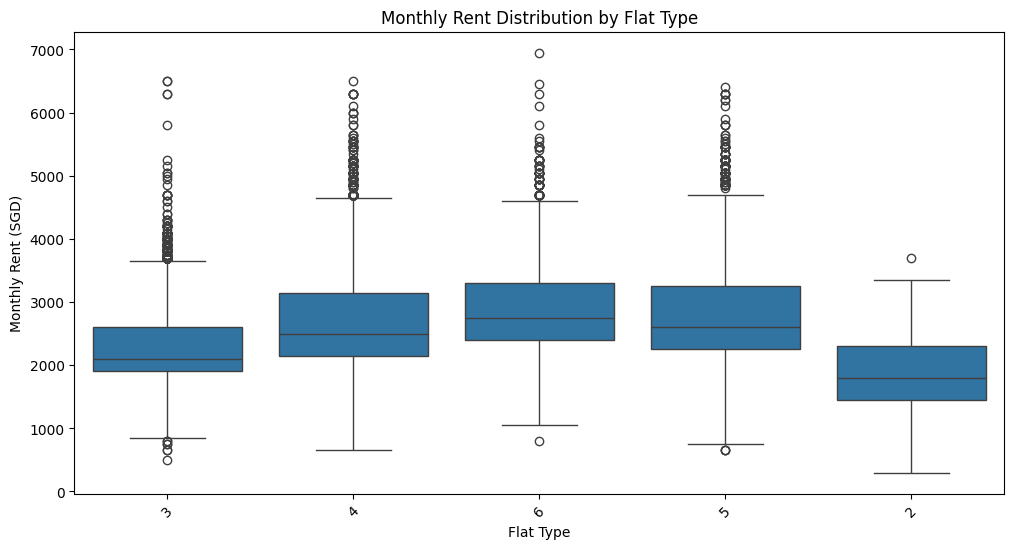

In [24]:
# Create a box plot of monthly rent by flat type
plt.figure(figsize=(12, 6))
sns.boxplot(x='flat_type', y='monthly_rent', data=df)
plt.title("Monthly Rent Distribution by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("Monthly Rent (SGD)")
plt.xticks(rotation=45)

plt.show()

# Process the sixth column(model)

In [25]:
# Display the frequency distribution of flat models
flat_model_counts = df['flat_model'].value_counts()
print(flat_model_counts)


flat_model
model a                   17122
improved                  17010
new generation            11292
premium apartment          5109
simplified                 2798
standard                   2268
apartment                  2080
maisonette                  956
model a2                    663
dbss                        371
type s1                     108
model a-maisonette           56
adjoined flat                49
type s2                      46
2-room                       34
premium apartment loft       25
premium maisonette            6
terrace                       4
3gen                          3
Name: count, dtype: int64


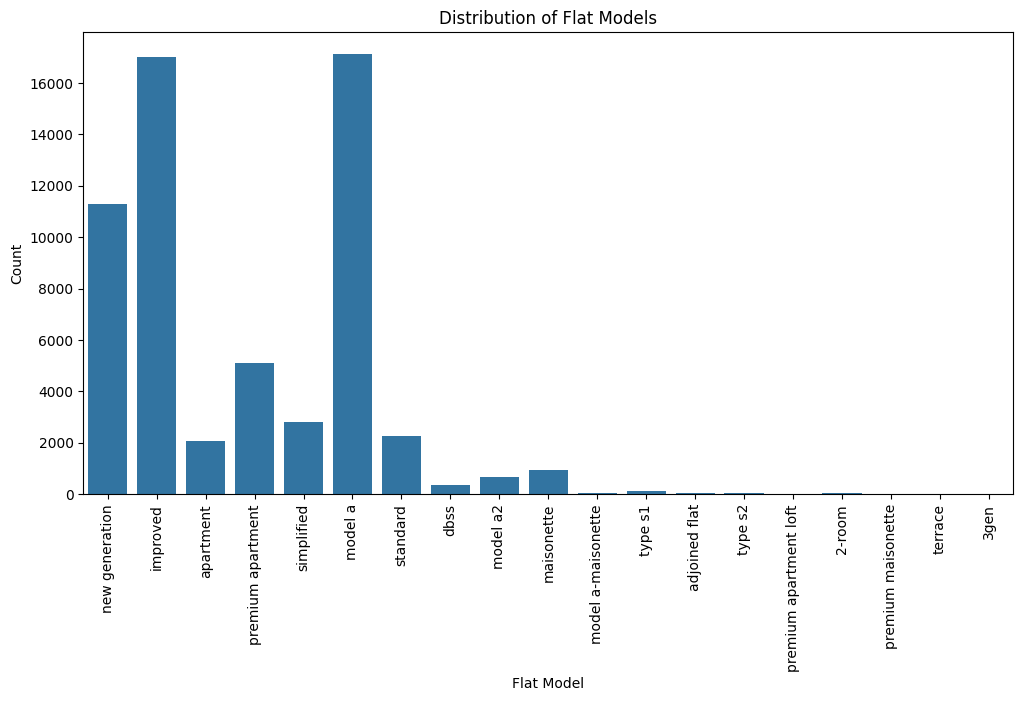

In [26]:
# Create a bar plot of flat models
plt.figure(figsize=(12, 6))
sns.countplot(x='flat_model', data=df)
plt.title("Distribution of Flat Models")
plt.xlabel("Flat Model")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


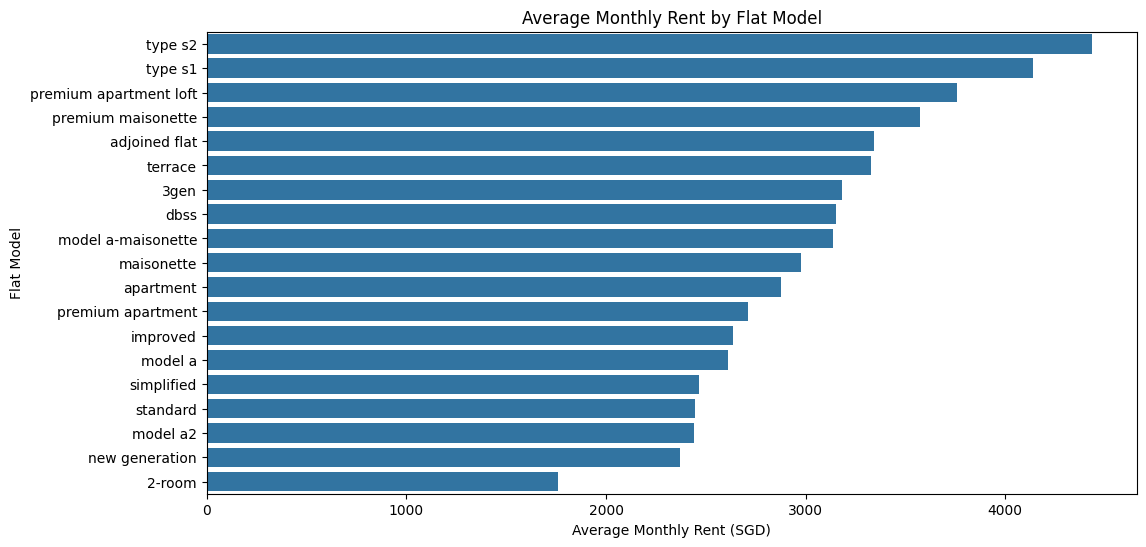

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean monthly rent for each flat model
flat_model_mean_rent = df.groupby('flat_model')['monthly_rent'].mean().reset_index()

# Sort the DataFrame by mean rent values in descending order
flat_model_mean_rent = flat_model_mean_rent.sort_values(by='monthly_rent', ascending=False)

# Create a bar plot of mean monthly rent by flat model
plt.figure(figsize=(12, 6))
sns.barplot(x='monthly_rent', y='flat_model', data=flat_model_mean_rent, orient='h')
plt.title("Average Monthly Rent by Flat Model")
plt.xlabel("Average Monthly Rent (SGD)")
plt.ylabel("Flat Model")
plt.show()


there is a potential relationship between the 'flat_model' categories and the target variable (e.g., 'monthly_rent'). Target encoding can capture the impact of each 'flat_model' category on the target variable.

In [28]:
# Calculate the mean monthly rent for each 'flat_model'
flat_model_means = df.groupby('flat_model')['monthly_rent'].mean().to_dict()

# Map the mean rent values to the 'flat_model' column
df['flat_model'] = df['flat_model'].map(flat_model_means)

# Display the encoded column
print(df['flat_model'])


0        2369.965462
1        2369.965462
2        2636.211052
3        2878.725962
4        2636.211052
            ...     
59995    2369.965462
59996    2612.031305
59997    2636.211052
59998    2444.223986
59999    2369.965462
Name: flat_model, Length: 60000, dtype: float64


In [29]:
df.head()

,index,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,0,8,2595.146199,257,Jurong East Street 24,3,2369.965462,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,1,16,2438.227223,119,bedok north road,4,2369.965462,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2,21,2516.680515,157,lorong 1 toa payoh,3,2636.211052,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,3,7,2686.857477,250,Pasir Ris Street 21,6,2878.725962,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,4,22,2665.537634,34,Whampoa West,3,2636.211052,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [30]:
df[['index', "rent_approval_date", "town", "block", "flat_type", "flat_model"]].to_csv("./preprocessed/train_1.csv", index=False)

In [34]:
# # Define the filename for the exported CSV file
# output_filename = "processed_data2.csv"

# # Export the DataFrame to a CSV file
# df.to_csv(output_filename, index=False)

# # Print a confirmation message
# print(f"The processed data has been exported to {output_filename}.")
